# Notebook Imports

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gather Data

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.shape

(2938, 19)

In [4]:
data.head()

,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19 years,Thinness_5-9 years,Income_composition,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.columns

Index(['Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Hepatitis_B', 'Measles ', ' BMI ',
       'Under-five_deaths ', 'Polio', 'Total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19 years',
       'Thinness_5-9 years', 'Income_composition', 'Schooling'],
      dtype='object')

In [6]:
data.tail()

,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19 years,Thinness_5-9 years,Income_composition,Schooling
2933,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


# Data Cleanup

In [7]:
data.isnull().any()

Life_expectancy            True
Adult_mortality            True
Infant_deaths             False
Alcohol                    True
Percentage_expenditure    False
Hepatitis_B                True
Measles                   False
 BMI                       True
Under-five_deaths         False
Polio                      True
Total_expenditure          True
Diphtheria                 True
 HIV/AIDS                 False
GDP                        True
Population                 True
Thinness_1-19 years        True
Thinness_5-9 years         True
Income_composition         True
Schooling                  True
dtype: bool

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(1649, 19)

In [10]:
data.isnull().any()

Life_expectancy           False
Adult_mortality           False
Infant_deaths             False
Alcohol                   False
Percentage_expenditure    False
Hepatitis_B               False
Measles                   False
 BMI                      False
Under-five_deaths         False
Polio                     False
Total_expenditure         False
Diphtheria                False
 HIV/AIDS                 False
GDP                       False
Population                False
Thinness_1-19 years       False
Thinness_5-9 years        False
Income_composition        False
Schooling                 False
dtype: bool

In [11]:
data.columns

Index(['Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Hepatitis_B', 'Measles ', ' BMI ',
       'Under-five_deaths ', 'Polio', 'Total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19 years',
       'Thinness_5-9 years', 'Income_composition', 'Schooling'],
      dtype='object')

# Data Visualisation

Text(0, 0.5, 'Nr. of records')

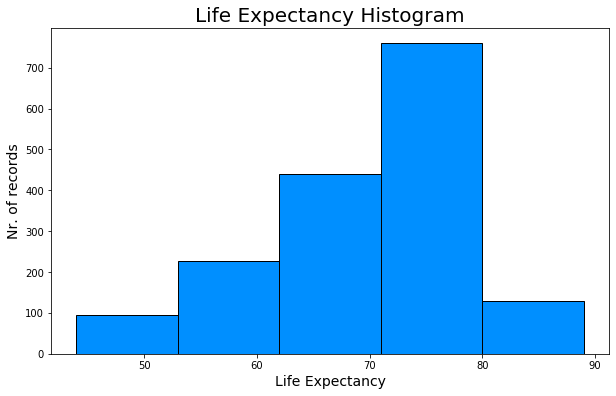

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Life Expectancy Histogram', fontsize=20)
plt.hist(data['Life_expectancy'], ec='black', bins=5, color='#008fff')
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Nr. of records', fontsize=14)

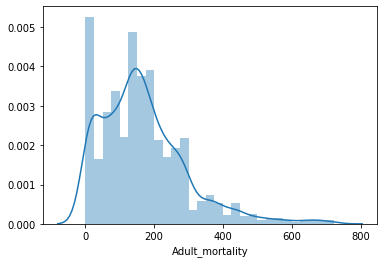

In [13]:
sns.distplot(data['Adult_mortality'])

# Descriptive Statistics

In [14]:
data['Life_expectancy'].mean()

69.30230442692543

In [15]:
data['Life_expectancy'].min()

44.0

In [16]:
data['Life_expectancy'].max()

89.0

In [17]:
data.describe()

,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19 years,Thinness_5-9 years,Income_composition,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


# Correlation

In [18]:
# mask for removing duplicate values in heatmap
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text yticklabel objects>)

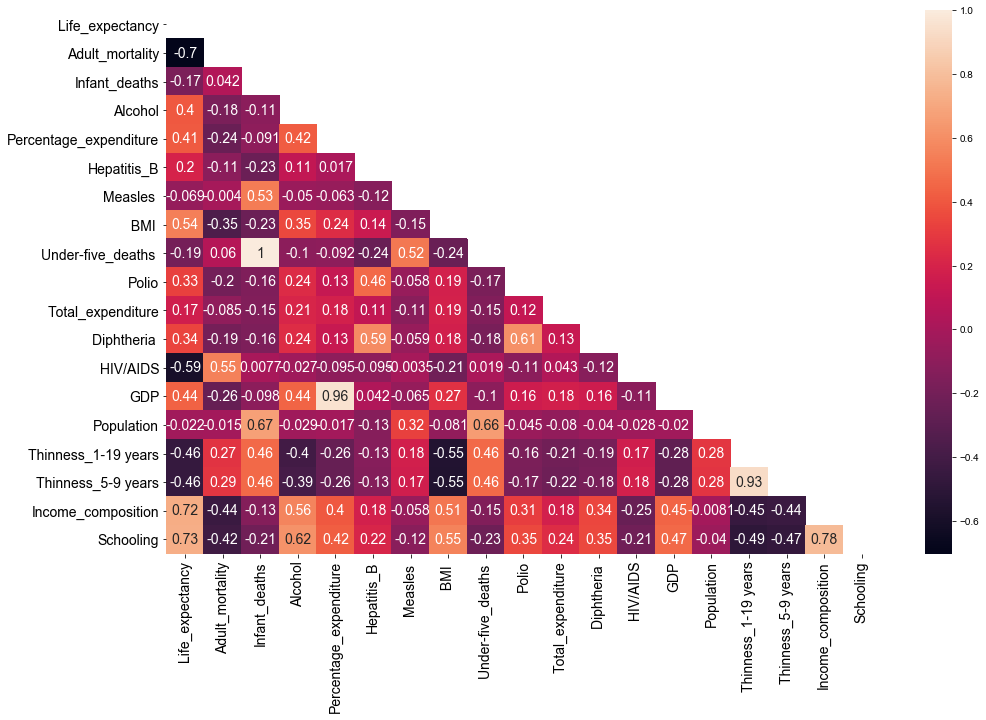

In [19]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Training and Test Data Split

In [20]:
life_ex = data['Life_expectancy']
features = data.drop('Life_expectancy', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, life_ex, 
                                                    test_size=0.2)


In [21]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('R-squared for training data:', regr.score(X_train, y_train))
print('R-squared for test data:', regr.score(X_test, y_test))

R-squared for training data: 0.8345068318991948
R-squared for test data: 0.833168100625836


NameError: name 'X_const' is not defined

In [29]:
X_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const).fit()

pd.DataFrame({'Coefs': model.params, 'pvalues': round(model.pvalues, 3)})


,Coefs,pvalues
const,5.257577e+01,0.000
Adult_mortality,-1.633274e-02,0.000
Infant_deaths,1.011333e-01,0.000
Alcohol,-6.878530e-02,0.046
Percentage_expenditure,3.714569e-04,0.074
Hepatitis_B,-6.895743e-03,0.170
Measles,-5.071740e-06,0.647
BMI,3.730973e-02,0.000
Under-five_deaths,-7.643173e-02,0.000
Polio,8.543420e-03,0.147


In [30]:
for i in range(data.shape[1]):
    vif = variance_inflation_factor(exog=X_const.values, exog_idx=i)
    print(vif)

68.28766445093454
1.7488383659600648
239.13346580939333
1.9733203504791463
12.973458101126083
1.697991663036439
1.5333819492480913
1.800770359910915
228.3849405745825
1.7587335302711242
1.107897788364373
2.127353422035025
1.4361162060062183
13.630125866446424
2.002766375316711
8.423084365895852
8.134861223920058
3.0905029112773
3.609282957370066


# Model Simplification

### Original Model - All features

In [33]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const).fit()

print('BIC:', model.bic)
print('R-squared:', model.rsquared)

BIC: 7238.828346537422
R-squared: 0.8345068318991948


### Reduced Model

In [34]:
X_const = sm.add_constant(X_train)
X_const = X_const.drop(['Hepatitis_B', 'Measles ', 'Population', 'GDP', 'Thinness_1-19 years', 'Polio'], axis=1)
model = sm.OLS(y_train, X_const).fit()

print('BIC:', model.bic)
print('R-squared:', model.rsquared)

BIC: 7200.031022586364
R-squared: 0.8339651207088645


# Graphing the Results

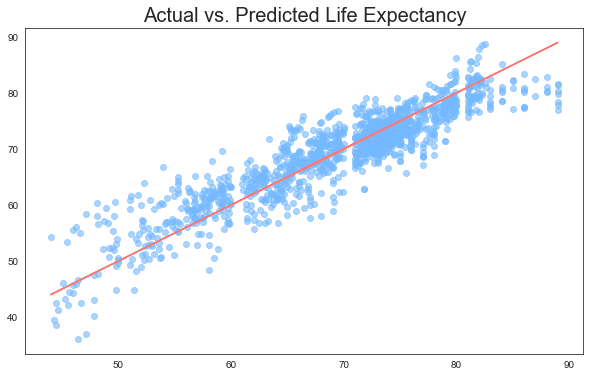

In [26]:
plt.figure(figsize=(10, 6))
plt.title('Actual vs. Predicted Life Expectancy', fontsize=20)
plt.scatter(x=y_train, y=model.fittedvalues, alpha=0.6, c='#74b9ff')
plt.plot(y_train, y_train, color='#ff7675')


In [25]:
pd.DataFrame({'Actual values': y_train, 'Predicted Values': model.fittedvalues})

,Actual values,Predicted Values
470,66.1,66.056233
2068,77.2,78.971913
1598,73.1,71.224231
2121,74.6,75.491296
1983,61.1,62.712143
...,...,...
1643,79.3,78.009787
580,74.2,72.878834
1036,79.3,76.952910
2651,71.0,71.943128
